# Assignment 8: Dimensionality Reduction

#### Student: Rodolfo Lerma

Dataset(s) needed: MNIST ("Modified National Institute of Standards and Technology") dataset.

# Learning Objectives
- Be able to make application decisions regarding principal component analysis to train and test data 
- Produce a dimensionality reduction model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
X = mnist.data / 255.0
y = mnist.target

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000,)


### Splitting the data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
print(X_test.shape, y_test.shape)

(21000, 784) (21000,)


In [7]:
print(X_train.shape, y_train.shape)

(49000, 784) (49000,)


### Data Exploration

In [8]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

Size of the dataframe: (70000, 786)


<Figure size 432x288 with 0 Axes>

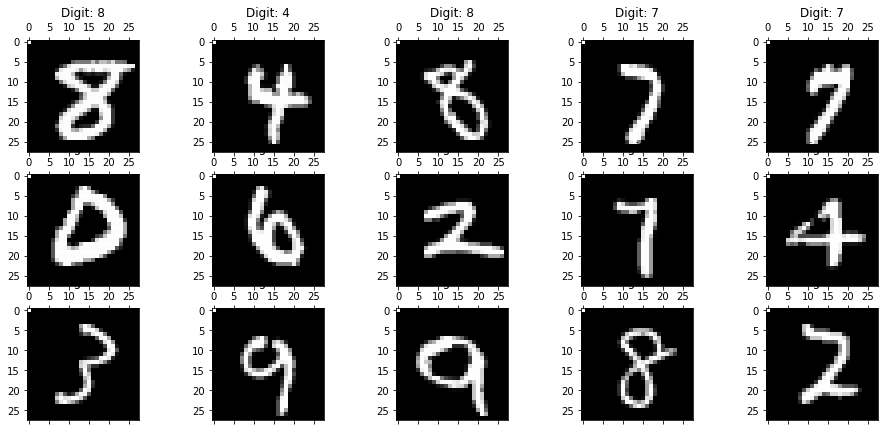

In [9]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [10]:
# X_train = #To Do
# y_train = #To Do

# X_test = #To Do
# y_test = #To Do

### Question 2: Train a Logistic Regression classifier on the dataset. Set solver = lbfgs and random_state = 42. Hint you might also want to think about the multi_class parameter and if you need to set that.  You want to track how long the model takes to run.

In [11]:
from sklearn.linear_model import LogisticRegression
import time
#Initializing time for comparison
time_start = time.time()

lr = LogisticRegression(solver='lbfgs', 
                        max_iter= 10000, 
                        multi_class = 'multinomial',
                        random_state=42)

lr.fit(X_train, y_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 59.601239919662476 seconds


### Question 3: Evaluate the resulting model on the test set.

In [12]:
# Use score method to get accuracy of model
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)

print('The accuracy for this model is: ' + str(round(lr_acc, 4) *100) + '%')

The accuracy for this model is: 92.06%


### Question 4: Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [14]:
standardized_scalar = StandardScaler()
standardized_scalar.fit(X_train)
X_train_std = standardized_scalar.transform(X_train)
X_test_std = standardized_scalar.transform(X_test)

In [15]:
# Make an instance of the Model
pca = PCA(.95) #Contraint given to the PCA model to obtain a model that explain the 95% of variation

In [16]:
pca.fit(X_train_std)

PCA(n_components=0.95)

In [17]:
pca.n_components_

327

In [18]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Question 5: Train a new Logistic Regression classifier on the reduced dataset and see how long it takes. Use the same criteria as before just with PCA. Was training much faster? Explain your results

In [19]:
time_start = time.time()

lr = LogisticRegression(solver='lbfgs', 
                        max_iter= 10000, 
                        multi_class = 'multinomial',
                        random_state=42)

lr.fit(X_train_pca, y_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 40.54761719703674 seconds


### Question 6: Evaluate the new classifier on the test set: how does it compare to the previous classifier? Discuss the speed / accuracy trade-off and in which case you'd prefer a very slight drop in model performance for a x-time speedup in training.

In [21]:
y_pred = lr.predict(X_test_pca)
lr_acc = accuracy_score(y_test, y_pred)

print('The accuracy for this model is: ' + str(round(lr_acc, 4) *100) + '%')

The accuracy for this model is: 92.2%


### Question 7. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: 
- What was your incoming experience with this model, if any? 
- What steps you took, 
- What obstacles you encountered. 
- How you link this exercise to real-world, machine learning problem-solving
- What steps were missing? 
- What else do you need to learn?

[Example to Review](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)